In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv('/content/adult_moins.csv', header=None, names=columns, na_values=' ?', skipinitialspace=True)


In [5]:
print("Données manquantes avant nettoyage :")
print(df.isnull().sum())
df.dropna(inplace=True)


Données manquantes avant nettoyage :
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [6]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [8]:
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # Vous pouvez tester aussi 'linear' ou 'poly'
svm_model.fit(X_train, y_train)


SVC(C=1)

In [12]:
y_pred = svm_model.predict(X_test)


In [13]:
print("\n📊 Classification Report :\n")
print(classification_report(y_test, y_pred))

print("\n✅ Accuracy Score :", accuracy_score(y_test, y_pred))


📊 Classification Report :

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        41
           1       0.00      0.00      0.00         9

    accuracy                           0.82        50
   macro avg       0.41      0.50      0.45        50
weighted avg       0.67      0.82      0.74        50


✅ Accuracy Score : 0.82


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


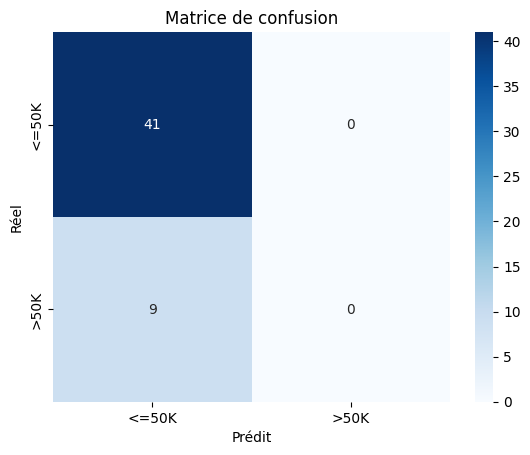

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

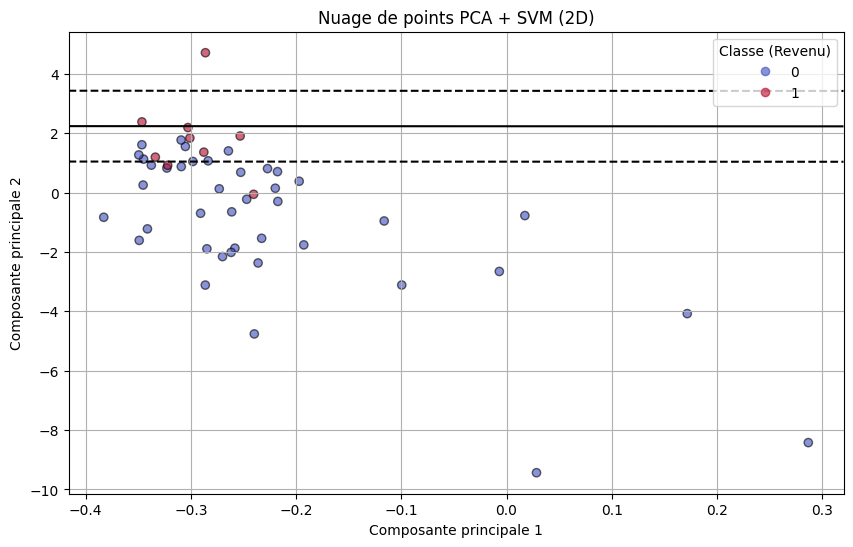

In [15]:
from sklearn.decomposition import PCA

# 🔹 Réduction à 2 dimensions avec PCA pour affichage
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 🔹 Split PCA Train/Test pour correspondre aux données SVM
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.2, random_state=42)

# 🔹 Entraîner un nouveau SVM sur les données réduites
svm_2d = SVC(kernel='linear')  # On utilise 'linear' pour tracer facilement l'hyperplan
svm_2d.fit(X_pca_train, y_train)

# 🔹 Nuage de points
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca_test[:,0], X_pca_test[:,1], c=y_test, cmap='coolwarm', alpha=0.6, edgecolors='k')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Nuage de points PCA + SVM (2D)')
plt.legend(*scatter.legend_elements(), title="Classe (Revenu)")
plt.grid(True)

# 🔹 Tracer la frontière de décision
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Créer grille
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = svm_2d.decision_function(xy).reshape(xx.shape)

# Tracer la frontière de décision et les marges
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
plt.contour(xx, yy, Z, colors='k', levels=[-1, 1], linestyles=['--'])

plt.show()
